In [1]:
from IPython.display import display, HTML
import ipywidgets as widgets
from ipywidgets import interact
display(HTML("<style>.container { width:75% !important; }</style>"))

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os.path

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

# Preprocessing

## Parameters

In [3]:
# parameters

_round_num = 3
_symbol = "COCONUTS"
# _day_ind = -2
# _day_range = [-1, 0, 1]
_day_range = [0, 1, 2]
_book_range = list(range(1, 3+1))
_max_time = 1000000
_time_step = 100

# Pairs analysis


In [4]:
def get_rtns(quote_df, turn_offsets):
    
    data = []
    
    for diff in turn_offsets:
        shifted = quote_df["mid_price"].shift(-1 * diff)
        
        if diff < 0:
            data += [quote_df["mid_price"] - shifted]
        else:
            data += [shifted - quote_df["mid_price"]]
        
    rtn_df = pd.concat(data, axis=1)
    rtn_df.columns = [f"d_{diff}" for diff in turn_offsets]
    
    return rtn_df.dropna()
 
    
def scatter_noise(x, y, xnoise=0.1, ynoise=0.1, s=0.1, label=None):
    xp = x + np.random.normal(scale=xnoise, size=len(x))
    yp = y + np.random.normal(scale=ynoise, size=len(y))
    
    plt.scatter(
        xp, yp, 
        s=s, 
        label=label,
    )

## load data

In [5]:
pina_quote_df_path = 'PINA_COLADAS_quote_df.csv'
coco_quote_df_path = 'COCONUTS_quote_df.csv'
if not os.path.isfile(pina_quote_df_path) or not os.path.isfile(coco_quote_df_path):
    print("files dont exists")
    print(os.path.isfile(pc_quote_df_path))
    print(os.path.isfile(coco_quote_df_path))

# read orig quote_df's from files
pina_quote_df = pd.read_csv(pina_quote_df_path, index_col=0)
coco_quote_df = pd.read_csv(coco_quote_df_path, index_col=0)


In [6]:
# calculate pair_quote_df
pair_quote_df = pina_quote_df[["time"]].copy()
pair_quote_df["mid_diff"] = pina_quote_df["mid_price"] - 1 * coco_quote_df["mid_price"]
pair_quote_df["mid_ratio"] = pina_quote_df["mid_price"] / coco_quote_df["mid_price"]


## Calc returns

In [7]:
turn_offsets = [-500, -100, -50, -30, -10, -1, 1, 10, 30, 50, 100, 500]

# calc rtns
pina_rtn_df = get_rtns(pina_quote_df, turn_offsets=turn_offsets)
coco_rtn_df = get_rtns(coco_quote_df, turn_offsets=turn_offsets)

pair_rtn_df = pina_rtn_df - coco_rtn_df
pair_rtn_df = pair_rtn_df.add_prefix("rel_")

In [8]:
# validation

index = 500
print("cur time")
display(pina_quote_df.loc[[index, index + 500]])
display(coco_quote_df.loc[[index, index + 500]])

print("cur rtns")
display(pina_rtn_df.loc[[index, index + 500]])
display(coco_rtn_df.loc[[index, index + 500]])
display(pair_rtn_df.loc[[index, index + 500]])


cur time


,buy_price,buy_size,time,sell_price,sell_size,mid_price,spread
500,15213.0,85.0,50000,15216.0,85.0,15214.5,3.0
1000,15233.0,97.0,100000,15236.0,97.0,15234.5,3.0


,buy_price,buy_size,time,sell_price,sell_size,mid_price,spread
500,8092.0,182.0,50000,8095.0,182.0,8093.5,3.0
1000,8110.0,167.0,100000,8113.0,167.0,8111.5,3.0


cur rtns


,d_-500,d_-100,d_-50,d_-30,d_-10,d_-1,d_1,d_10,d_30,d_50,d_100,d_500
500,-12.0,-2.5,-13.0,-14.0,-7.0,0.5,3.0,4.0,7.0,11.0,-4.0,20.0
1000,20.0,-6.0,18.0,12.0,1.0,1.5,-0.5,4.0,4.0,-2.5,-12.0,-76.0


,d_-500,d_-100,d_-50,d_-30,d_-10,d_-1,d_1,d_10,d_30,d_50,d_100,d_500
500,-21.0,-1.0,-3.0,-2.0,0.0,1.0,1.0,0.0,3.0,2.0,-2.0,18.0
1000,18.0,-8.0,4.0,4.0,2.0,0.0,-1.0,0.0,-2.5,-3.0,-4.0,-14.0


,rel_d_-500,rel_d_-100,rel_d_-50,rel_d_-30,rel_d_-10,rel_d_-1,rel_d_1,rel_d_10,rel_d_30,rel_d_50,rel_d_100,rel_d_500
500,9.0,-1.5,-10.0,-12.0,-7.0,-0.5,2.0,4.0,4.0,9.0,-2.0,2.0
1000,2.0,2.0,14.0,8.0,-1.0,1.5,0.5,4.0,6.5,0.5,-8.0,-62.0


## plot simple diff data

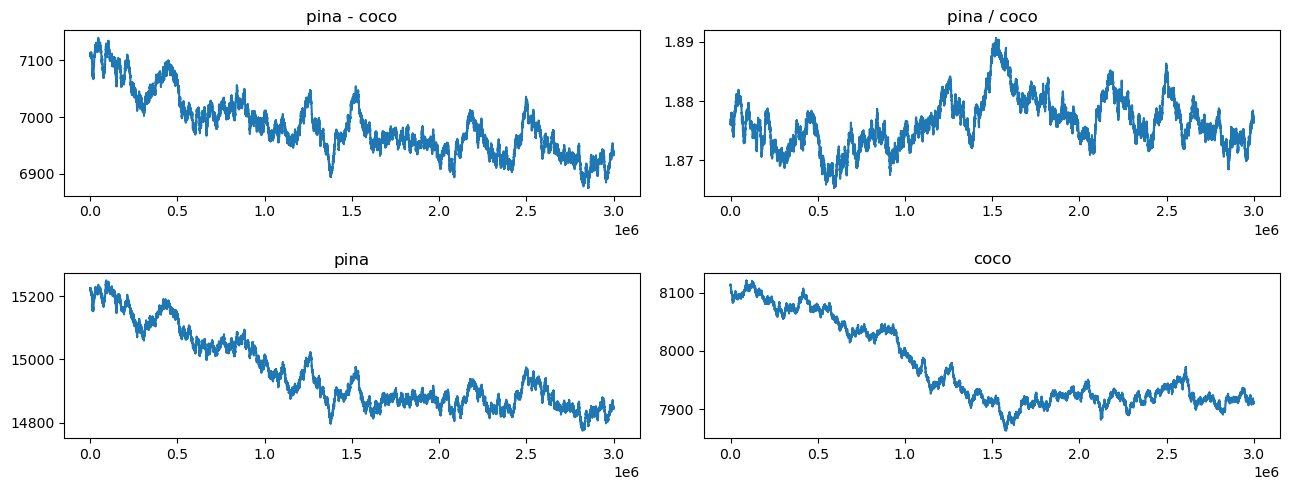

In [9]:
plt.figure(figsize=(13, 5))

plt.subplot(221)
plt.plot(pair_quote_df["time"], pair_quote_df["mid_diff"], label="pina - coco")
plt.title("pina - coco")

plt.subplot(222)
plt.plot(pair_quote_df["time"], pair_quote_df["mid_ratio"], label="pina / coco")
plt.title("pina / coco")

plt.subplot(223)
plt.plot(pina_quote_df["time"], pina_quote_df["mid_price"], label="pina")
plt.title("pina")

plt.subplot(224)
plt.plot(coco_quote_df["time"], coco_quote_df["mid_price"], label="coco")
plt.title("coco")

plt.tight_layout()
plt.show()


## pina: d_-1 vs d_1

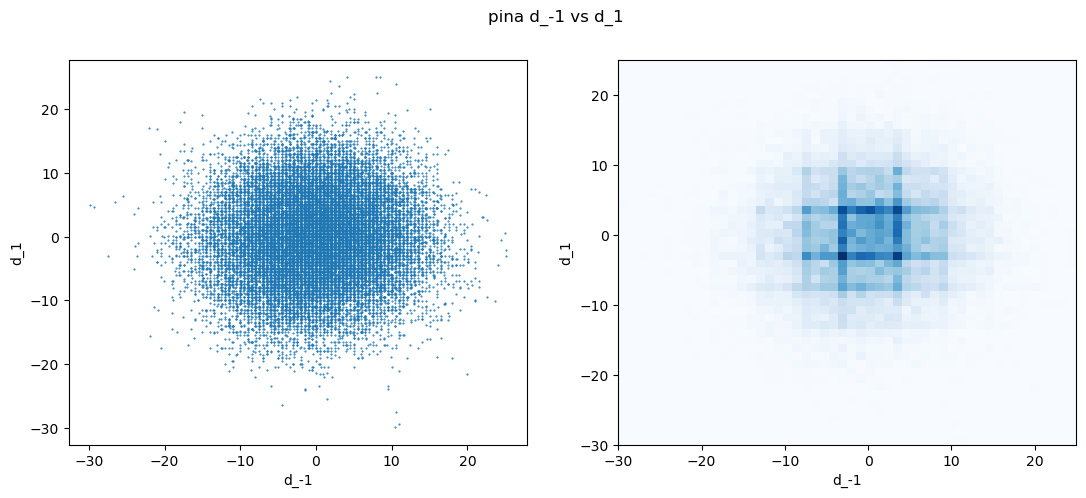

In [10]:
# histogram of d_-1 vs d_1
x = pina_rtn_df["d_-10"]
y = pina_rtn_df["d_10"]

plt.figure(figsize=(13, 5))

plt.subplot(121)
scatter_noise(x, y, xnoise=0.05, ynoise=0.05, s=0.25)
plt.xlabel("d_-1")
plt.ylabel("d_1")

plt.subplot(122)
plt.hist2d(x, y, bins=50, cmap="Blues")
plt.xlabel("d_-1")
plt.ylabel("d_1")

plt.suptitle("pina d_-1 vs d_1")
plt.show()


## coco: d_-1 vs d_1

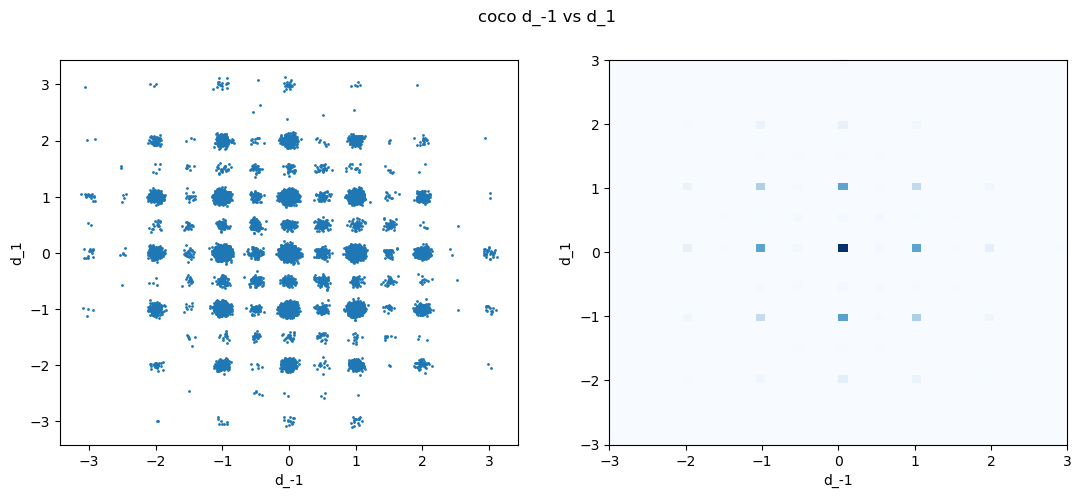

In [11]:
# histogram of d_-1 vs d_1

# lb = 2000
# lb_offset = 200
# ub = lb + lb_offset

lb, ub = 0, -1

df = coco_rtn_df
df = df.iloc[lb:ub]

x = df["d_-1"]
y = df["d_1"]

plt.figure(figsize=(13, 5))

plt.subplot(121)
scatter_noise(x, y, xnoise=0.05, ynoise=0.05, s=1)
plt.xlabel("d_-1")
plt.ylabel("d_1")

plt.subplot(122)
plt.hist2d(x, y, bins=50, cmap="Blues")
plt.xlabel("d_-1")
plt.ylabel("d_1")

plt.suptitle("coco d_-1 vs d_1")
plt.show()


## pair: pina d_1 vs coco d_1

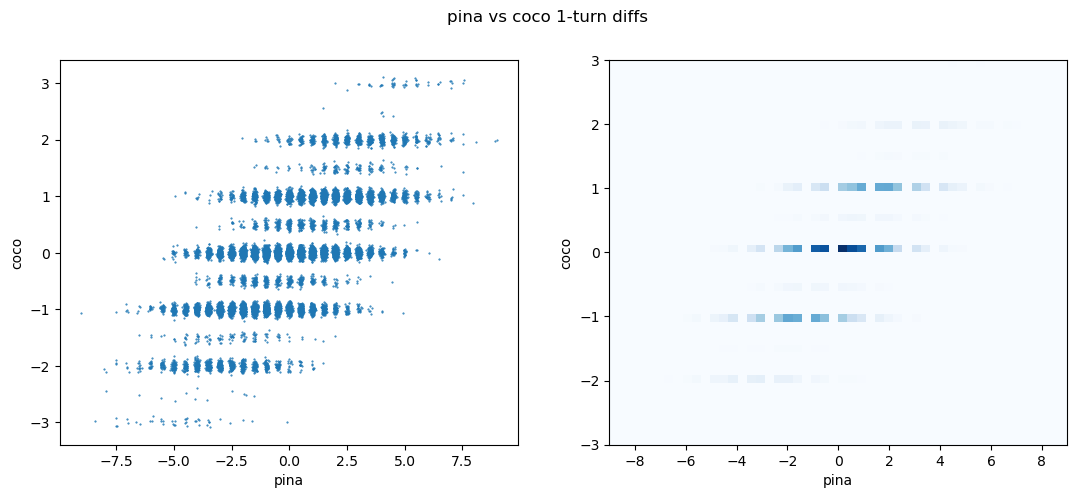

In [12]:
## plot pairs data

x = pina_rtn_df["d_1"]
y = coco_rtn_df["d_1"]

plt.figure(figsize=(13, 5))

plt.subplot(121)
scatter_noise(x, y, xnoise=0.05, ynoise=0.05, s=0.25)
plt.xlabel("pina")
plt.ylabel("coco")

plt.subplot(122)
plt.hist2d(x, y, bins=50, cmap="Blues")
plt.xlabel("pina")
plt.ylabel("coco")

plt.suptitle("pina vs coco 1-turn diffs")
plt.show()


## pair: predict pina -> coco

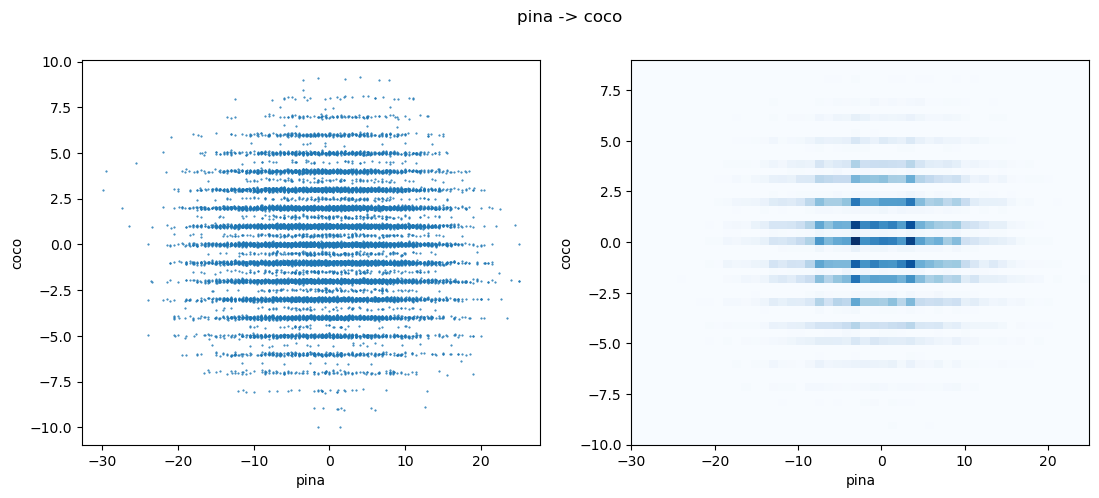

In [13]:
## plot pairs data

x = pina_rtn_df["d_-10"]
y = coco_rtn_df["d_10"]

plt.figure(figsize=(13, 5))

plt.subplot(121)
scatter_noise(x, y, xnoise=0.05, ynoise=0.05, s=0.25)
plt.xlabel("pina")
plt.ylabel("coco")

plt.subplot(122)
plt.hist2d(x, y, bins=50, cmap="Blues")
plt.xlabel("pina")
plt.ylabel("coco")

plt.suptitle("pina -> coco")
plt.show()


## pair: predict pina -> coco

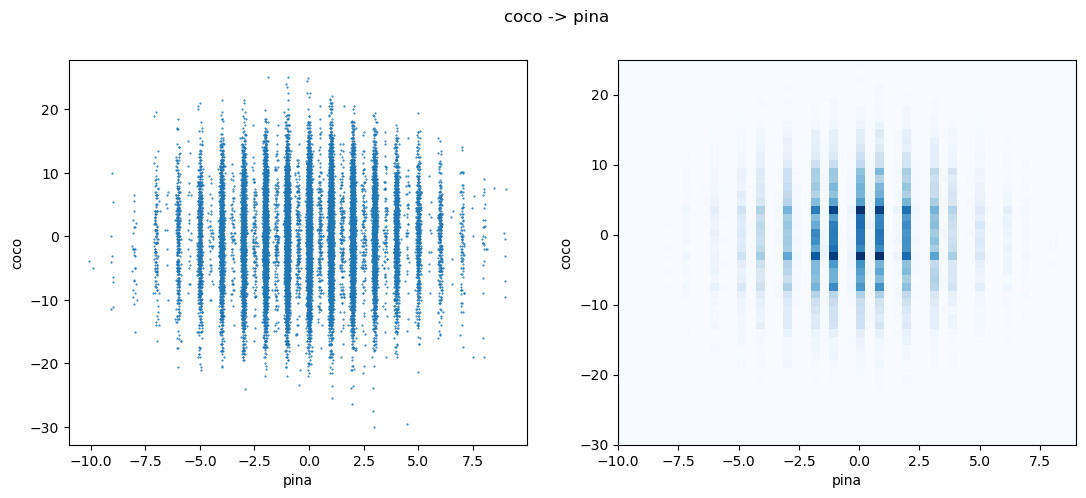

In [14]:
## plot pairs data

x = coco_rtn_df["d_-10"]
y = pina_rtn_df["d_10"]

plt.figure(figsize=(13, 5))

plt.subplot(121)
scatter_noise(x, y, xnoise=0.05, ynoise=0.05, s=0.25)
plt.xlabel("pina")
plt.ylabel("coco")

plt.subplot(122)
plt.hist2d(x, y, bins=50, cmap="Blues")
plt.xlabel("pina")
plt.ylabel("coco")

plt.suptitle("coco -> pina")
plt.show()


## pair trading: return to mean

In [15]:
# fit initial predictor
# X is predicting y

# X = coco_rtn_df[["d_100"]]
# y = pina_rtn_df[["d_100"]]

X = pina_rtn_df[["d_100"]]
y = coco_rtn_df[["d_100"]]

reg = LinearRegression().fit(X, y)

r2 = reg.score(X, y)
print("r2", r2)

print("weight", reg.coef_)
print("bias", reg.intercept_)


r2 0.5548542528304601
weight [[0.2868271]]
bias [-0.20630685]


In [16]:
# use previous error of predictor, to predict future error of predictor
### e.g.

ypred = reg.predict(X)

pred_df = pd.DataFrame(ypred, columns=y.columns.str.replace("d", "pred"), index=y.index)

for col in y.columns:
    offset = col.replace("d_", "")
    
    orig_col = "d_" + offset
    pred_col = "pred_" + offset
    error_col = "error_" + offset
    prev_error_col = "prev_error_" + offset
    
    # create pred_df with 
    pred_df[orig_col] = y[orig_col]
    pred_df[error_col] = pred_df[orig_col] - pred_df[pred_col]

    # get previous turns error
    pred_df[prev_error_col] = pred_df[error_col].shift(-1 * -100)
    
pred_df = pred_df.dropna()

# add time col
pred_df["time"] = pina_quote_df["time"]


In [17]:
def show_preds(
        chunk_size,
        chunk_index_start=0,
        num_shown=2,
        ):
    
    xcol = "prev_error_100"
    ycol = "error_100"
    
#     num_chunks = np.ceil(len(pred_df) / chunk_size).astype(int)

    for i in range(num_shown):
        
        chunk_index = chunk_index_start + i
        
        lb = chunk_size * chunk_index
        ub = min(lb + chunk_size, len(pred_df))
        df = pred_df.iloc[lb:ub]
        
        
        # calculate the time lb/ubs
        time_lb = df.iloc[0]["time"]
        time_ub = df.iloc[-1]["time"]
        
        print(lb, ub, time_lb, time_ub)

        scatter_noise(df[xcol], df[ycol], s=1, label=f"{time_lb} - {time_ub}")
        
    xmin = pred_df[xcol].min()
    xmax = pred_df[xcol].max()
    ymin = pred_df[ycol].min()
    ymax = pred_df[ycol].max()
        
    plt.xlim(xmin, xmax)
    plt.ylim(ymin, ymax)
    
    
    plt.xlabel(xcol)
    plt.ylabel(ycol)
    plt.legend()
    
    plt.title(f"prev_error vs error - chunk_size={chunk_size}")
    
    plt.show()
    


In [18]:
interact(
    show_preds,
    chunk_size=200,
    chunk_index_start=(0, 1000, 1),
    num_shown=(1, 100, 1),
)

interactive(children=(IntSlider(value=200, description='chunk_size', max=600, min=-200), IntSlider(value=0, de…

<function __main__.show_preds(chunk_size, chunk_index_start=0, num_shown=2)>

In [19]:
X, y = pred_df[["prev_error_100"]], pred_df["error_100"]

reg = LinearRegression().fit(X, y)

print("r2", reg.score(X, y))


r2 0.0006079777905853012


## relative value

,count,mean,std,min,25%,50%,75%,max
mid_ratio,10000.0,1.873223,0.003094,1.865331,1.871038,1.873217,1.875348,1.88191


Text(0.5, 1.0, 'mid ratio hist')

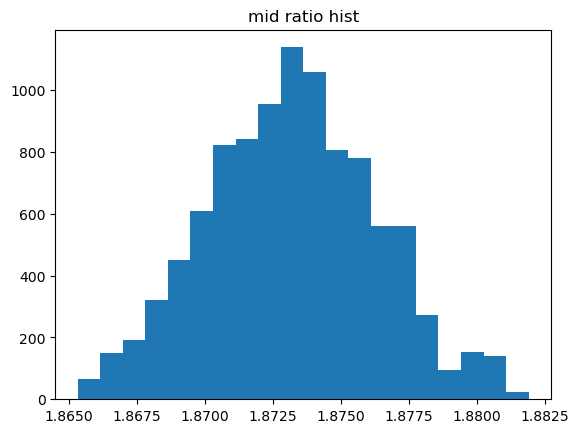

In [20]:
df = pair_quote_df.iloc[:10000]

# show stats on mid ratio
display(df[["mid_ratio"]].describe().T)

plt.hist(df["mid_ratio"], bins=20)
plt.title("mid ratio hist")

In [21]:
# calculate mids
mid_df = coco_quote_df.merge(pina_quote_df, on=["time"], suffixes=("_coco", "_pina"))
mid_df = mid_df.rename({"mid_price_coco": "coco_price", "mid_price_pina": "pina_price"}, axis=1)
mid_df = mid_df[["coco_price", "pina_price", "time"]]

In [22]:
# fit a linear model to prices
x = mid_df["coco_price"]
y = mid_df["pina_price"]
model = np.poly1d(np.polyfit(x, y, deg=1))
print("m, b", model.coef.astype(float))

model1 = np.poly1d(np.polyfit(x.iloc[:10000], y.iloc[:10000], deg=1))
model2 = np.poly1d(np.polyfit(x.iloc[10000:20000], y.iloc[10000:20000], deg=1))
model3 = np.poly1d(np.polyfit(x.iloc[20000:], y.iloc[20000:], deg=1))


m, b [1.62895288e+00 1.97189365e+03]


In [23]:
model1

poly1d([ 2.15897191e+00, -2.30388310e+03])

In [24]:
model2

poly1d([1.25941536e+00, 4.91460631e+03])

In [25]:
model3

poly1d([   1.95716416, -638.66358574])

In [26]:
# get rv (old stuff)
pair_quote_df["ratio_ma"] = pair_quote_df["mid_ratio"].ewm(span=21).mean()
pair_quote_df["ratio_diff"] = pair_quote_df["mid_ratio"] - pair_quote_df["ratio_ma"]

# predict pina price
pair_quote_df["pina_pred"] = model(mid_df["coco_price"])
pair_quote_df["pina_error"] = mid_df["pina_price"] - pair_quote_df["pina_pred"]


### linear model, coco to pina price

In [27]:
pair_quote_df.to_csv("pair_data.csv")

In [28]:
pair_quote_df[["pina_error"]].describe([0.1, 0.25, 0.5, 0.75, 0.9]).T


,count,mean,std,min,10%,25%,50%,75%,90%,max
pina_error,30000.0,-4.927278e-12,29.443716,-75.870169,-36.326489,-21.499122,-2.485065,18.903548,38.822564,100.985066


(array([  15.,   19.,   11.,   74.,  112.,  178.,  268.,  375.,  435.,
         552.,  787.,  919.,  967., 1095., 1191., 1360., 1324., 1173.,
        1319., 1551., 1676., 1465., 1362., 1235., 1101., 1044., 1128.,
         958.,  832.,  914.,  728.,  604.,  476.,  397.,  362.,  381.,
         298.,  217.,  234.,  162.,  143.,  112.,   47.,   57.,  100.,
          92.,   52.,   56.,   32.,   10.]),
 array([-75.87016934, -72.33306462, -68.79595991, -65.2588552 ,
        -61.72175049, -58.18464577, -54.64754106, -51.11043635,
        -47.57333164, -44.03622693, -40.49912221, -36.9620175 ,
        -33.42491279, -29.88780808, -26.35070337, -22.81359865,
        -19.27649394, -15.73938923, -12.20228452,  -8.66517981,
         -5.12807509,  -1.59097038,   1.94613433,   5.48323904,
          9.02034375,  12.55744847,  16.09455318,  19.63165789,
         23.1687626 ,  26.70586731,  30.24297203,  33.78007674,
         37.31718145,  40.85428616,  44.39139087,  47.92849559,
         51.4656003 ,  5

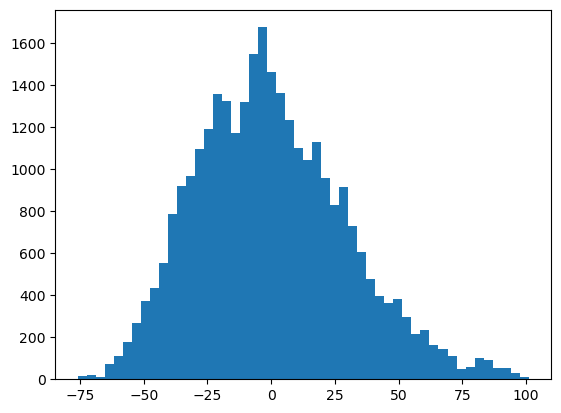

In [29]:
plt.hist(pair_quote_df["pina_error"], bins=50)

In [30]:
pair_quote_df[pair_quote_df["pina_error"] > 50]

,time,mid_diff,mid_ratio,ratio_ma,ratio_diff,pina_pred,pina_error
267,26700,7115.5,1.878619,1.878036,0.000583,15163.968546,50.031454
268,26800,7117.0,1.878805,1.878106,0.000699,15163.968546,51.531454
269,26900,7118.5,1.878881,1.878176,0.000705,15165.597499,52.402501
270,27000,7119.0,1.878835,1.878236,0.000598,15167.226452,52.273548
271,27100,7119.0,1.878943,1.878301,0.000643,15165.597499,52.902501
...,...,...,...,...,...,...,...
25069,2506900,7019.0,1.883727,1.884070,-0.000343,14909.851897,51.648103
25070,2507000,7019.5,1.883790,1.884045,-0.000255,14909.851897,52.148103
25071,2507100,7020.0,1.883630,1.884007,-0.000377,14913.109803,51.390197
25074,2507400,7018.0,1.883490,1.883855,-0.000365,14911.480850,50.019150


In [31]:
pair_rtn_df["rel_d_10"]

500      4.0
501      3.0
502      5.0
503      5.5
504      5.5
        ... 
29495    3.0
29496    2.5
29497    5.0
29498    4.0
29499    0.5
Name: rel_d_10, Length: 29000, dtype: float64

In [32]:
df = pair_quote_df.join(pair_rtn_df).dropna()

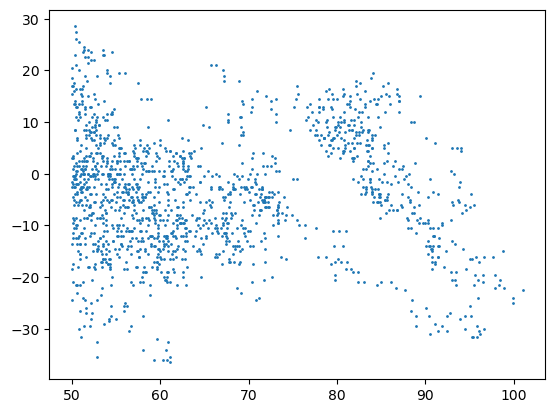

In [33]:
df = df[df["pina_error"] > 50]
plt.scatter(df["pina_error"], df["rel_d_50"], s=1)

In [34]:
x = df[["pina_error"]]
y = df["rel_d_50"]

reg = LinearRegression().fit(x, y)
reg.score(x, y)

0.0023304886378795464

### fit a sigmoid to pina_error

In [35]:
from scipy.optimize import curve_fit

def sigmoid(k, x):
    return 1 / (1 + np.exp(-k*x))

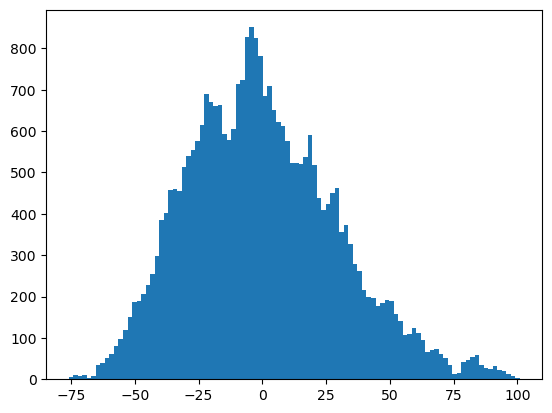

In [36]:
# plot distribution 
arr = np.sort(pair_quote_df["pina_error"])
cdf = np.arange(len(arr)) / len(arr)

counts = plt.hist(arr, bins=100)
plt.show()

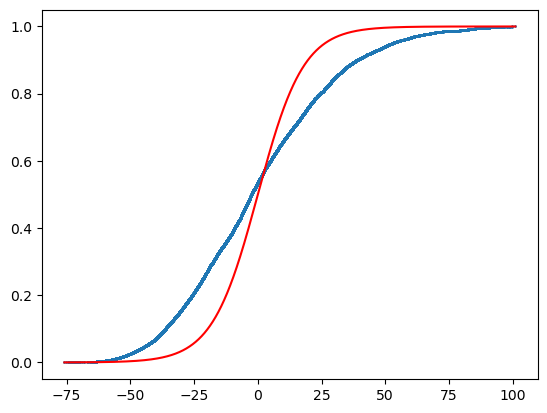

In [37]:
# fit a sigmoid
initial_guess = [1]
popt, pcov = curve_fit(sigmoid, arr, cdf, initial_guess, method='dogbox')

fit_fn = lambda x : sigmoid(popt[0]*2, x)
# fit_fn = lambda x : sigmoid(*popt, x)

# plot data + line
plt.scatter(arr, cdf, s=1)
plt.plot(arr, fit_fn(arr), color="red")

In [38]:
(fit_fn(5.13) - 0.5) / 0.5 * 300


83.7767302660491

### model as mean-reverting random walk?

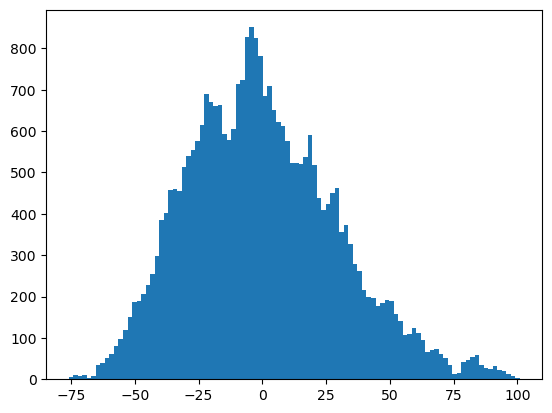

In [39]:
# get probabilities for 100 chunks
counts, bounds, _ = plt.hist(arr, bins=100)
# get means of bounds
bounds = [(bounds[i] + bounds[i+1])/2 for i in range(len(bounds) - 1)]
# get probabilities
probs = pd.DataFrame({"prob": counts / np.sum(counts), "x": bounds})


In [40]:
# shift up/down by 1
probs["up"] = probs["prob"].shift(-1)
probs["down"] = probs["prob"].shift(1)
probs = probs.dropna()

# get relative probability going up/down
probs["prob_total"] = probs["up"] + probs["down"]
probs["up"] = probs["up"] / probs["prob_total"]
probs["down"] = probs["down"] / probs["prob_total"]
probs["abs_x"] = abs(probs["x"])

In [41]:
probs["rtn"] = (probs["abs_x"] + 1) * probs["up"] * probs["prob"]

In [42]:
summ = probs.sort_values(by="rtn", ascending=False)
display(summ[summ["x"] >= 0].iloc[:10])
display(summ[summ["x"] <= 0].iloc[:10])

,prob,x,up,down,prob_total,abs_x,rtn
58,0.015033,27.590143,0.522573,0.477427,0.029533,27.590143,0.224605
59,0.015433,29.358696,0.440447,0.559553,0.026867,29.358696,0.206365
61,0.012433,32.895801,0.478708,0.521292,0.022700,32.895801,0.201746
57,0.014100,25.821591,0.524419,0.475581,0.028667,25.821591,0.198327
53,0.019667,18.747382,0.491012,0.508988,0.035233,18.747382,0.190692
52,0.017933,16.978829,0.531532,0.468468,0.037000,16.978829,0.171377
60,0.011833,31.127248,0.446172,0.553828,0.027867,31.127248,0.169622
56,0.013633,24.053039,0.490719,0.509281,0.028733,24.053039,0.167608
62,0.010867,34.664353,0.427035,0.572965,0.021700,34.664353,0.165499
70,0.006367,48.812772,0.508021,0.491979,0.012467,48.812772,0.161115


,prob,x,up,down,prob_total,abs_x,rtn
22,0.015267,-36.077741,0.534803,0.465197,0.028733,36.077741,0.302727
20,0.012867,-39.614846,0.573677,0.426323,0.023300,39.614846,0.299791
25,0.017067,-30.772084,0.543173,0.456827,0.033200,30.772084,0.294532
21,0.013367,-37.846294,0.542654,0.457346,0.028133,37.846294,0.281771
26,0.018033,-29.003532,0.519700,0.480300,0.035533,29.003532,0.281191
29,0.020500,-23.697875,0.545024,0.454976,0.042200,23.697875,0.275949
30,0.023000,-21.929322,0.521401,0.478599,0.042833,21.929322,0.274973
23,0.015367,-34.309189,0.498357,0.501643,0.030433,34.309189,0.270401
27,0.018467,-27.234980,0.515667,0.484333,0.037233,27.234980,0.268872
24,0.015167,-32.540637,0.526208,0.473792,0.032433,32.540637,0.267682


In [43]:
summ[summ["x"] >= 15]

,prob,x,up,down,prob_total,abs_x,rtn
58,0.015033,27.590143,0.522573,0.477427,0.029533,27.590143,0.224605
59,0.015433,29.358696,0.440447,0.559553,0.026867,29.358696,0.206365
61,0.012433,32.895801,0.478708,0.521292,0.022700,32.895801,0.201746
57,0.014100,25.821591,0.524419,0.475581,0.028667,25.821591,0.198327
53,0.019667,18.747382,0.491012,0.508988,0.035233,18.747382,0.190692
52,0.017933,16.978829,0.531532,0.468468,0.037000,16.978829,0.171377
60,0.011833,31.127248,0.446172,0.553828,0.027867,31.127248,0.169622
56,0.013633,24.053039,0.490719,0.509281,0.028733,24.053039,0.167608
62,0.010867,34.664353,0.427035,0.572965,0.021700,34.664353,0.165499
70,0.006367,48.812772,0.508021,0.491979,0.012467,48.812772,0.161115


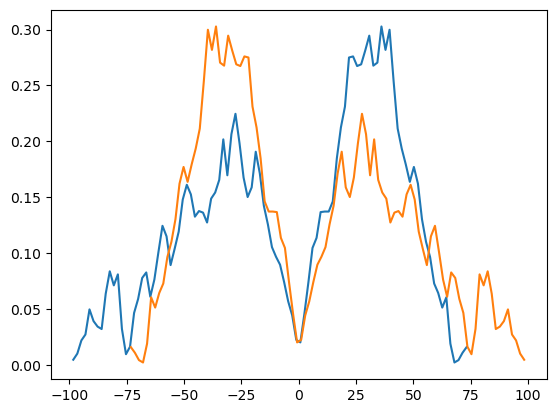

In [44]:
plt.plot(-probs["x"], probs["rtn"])
plt.plot(probs["x"], probs["rtn"])


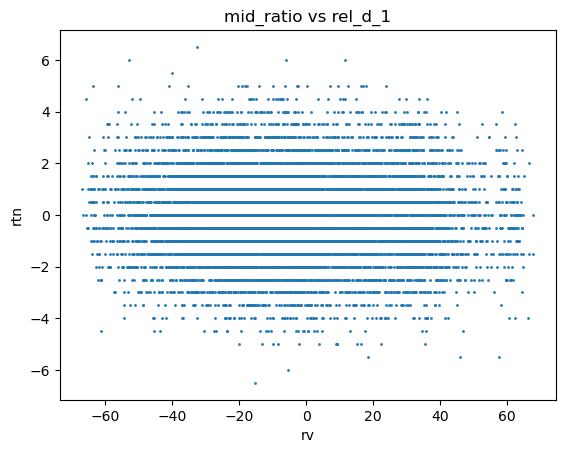

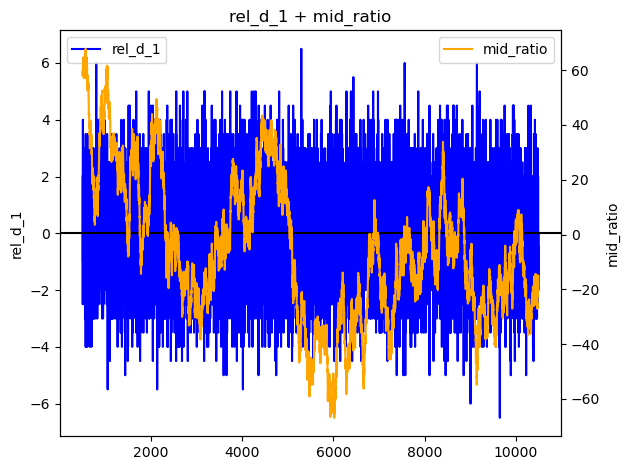

In [45]:
offset = 1
lb, lb_offset = 0, 10000
ub = lb + lb_offset

inds = pair_rtn_df.index.intersection(pair_quote_df.index)
inds = inds.to_series().iloc[lb:ub]

# mid ratio vs rel_d_offset
rvs = pair_quote_df.loc[inds]["pina_error"]
# rvs = pair_quote_df.loc[inds]["mid_ratio"] - pair_quote_df["mid_ratio"].mean()
# rvs = pair_quote_df.loc[inds]["ratio_diff"]
rtns = pair_rtn_df.loc[inds][f"rel_d_{offset}"]

plt.scatter(
    x=rvs,
    y=rtns,
    s=1,
)
plt.xlabel("rv")
plt.ylabel("rtn")
plt.title(f"mid_ratio vs rel_d_{offset}")
plt.show()

## first axis

fig, ax1 = plt.subplots()

ax1.plot(
    inds,
    rtns,
    label=f"rel_d_{offset}",
    color="blue",
)
ax1.set_ylabel(f"rel_d_{offset}")

## second axis

ax2 = ax1.twinx()
ax2.plot(
    inds,
    rvs,
    label="mid_ratio",
    color="orange",
)
ax2.set_ylabel("mid_ratio")

# draw hlines
ax1.axhline(y=0, color="black")

# draw labels
ax1.legend(loc=2)
ax2.legend(loc=1)

# overall plot features
plt.title(f"rel_d_{offset} + mid_ratio")

plt.tight_layout()
plt.show()

In [46]:
reg = LinearRegression().fit(rvs.to_frame(), rtns)
reg.score(rvs.to_frame(), rtns)

0.0009084006744675133

### func - plot_mids

In [47]:
def plot_mids(lb, offset, use_fade=False):
    # filter time
    ub = lb + offset
    
    df = mid_df.iloc[lb:ub]
    
    print("bounds", lb, ub)
    
    if ub > len(mid_df):
        print("end")
        



    x = df["coco_price"]
    y = df["pina_price"]

    xmin, xmax = mid_df["coco_price"].min(), mid_df["coco_price"].max()
    ymin, ymax = mid_df["pina_price"].min(), mid_df["pina_price"].max()

    if use_fade:
        alphas = np.arange(0, 1, 1 / offset) ** 2
    else:
        alphas = 1
    
    plt.scatter(x, y, alpha=alphas, s=1)
    plt.xlim(xmin - 10, xmax + 10)
    plt.ylim(ymin - 10, ymax + 10)
    
    # plot line of best fit
    
    ypred = model(mid_df["coco_price"])
    plt.plot(mid_df["coco_price"], ypred, color="black", alpha=1, linewidth=1, label="m_all")
    
    ypred = model1(mid_df["coco_price"])
    plt.plot(mid_df["coco_price"], ypred, color="blue", alpha=1, linewidth=1, label="m1")
    
    ypred = model2(mid_df["coco_price"])
    plt.plot(mid_df["coco_price"], ypred, color="purple", alpha=1, linewidth=1, label="m2")
    
    ypred = model3(mid_df["coco_price"])
    plt.plot(mid_df["coco_price"], ypred, color="red", alpha=1, linewidth=1, label="m3")
    
    plt.legend()

bounds 0 30000


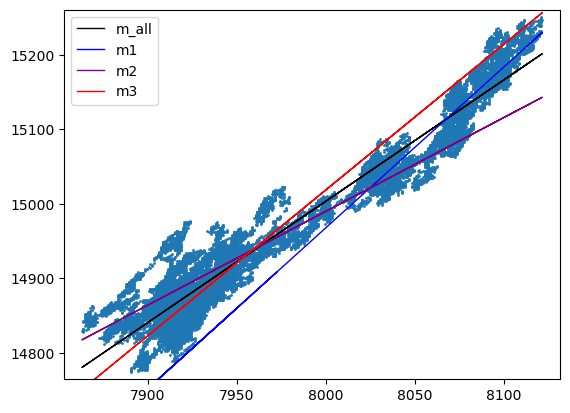

In [48]:
# plot all mids
plot_mids(0, 30000, use_fade=False)

### plot_mids - animated

In [49]:
# "animated" plot of mid prices of coco vs pina
interact(
    plot_mids,
    lb=(0, 30000, 100),
    offset=(0, 30000, 100),
    use_fade=True
)

interactive(children=(IntSlider(value=15000, description='lb', max=30000, step=100), IntSlider(value=15000, de…

<function __main__.plot_mids(lb, offset, use_fade=False)>

## multiple linregs

In [73]:
chunk_size = 100
num_chunks = len(mid_df) // chunk_size

big_model = np.poly1d(np.polyfit(mid_df["coco_price"], mid_df["pina_price"], deg=1))

models = []

train_scores = []
test_scores = []
big_test_scores = []


plt.figure(figsize=(12, 12))

# iterate for on less chunk
for ind in range(len(mid_df) // 10 - chunk_size):
    lb = ind
    ub = lb + chunk_size
    
    # get train/test data
    df = mid_df.iloc[lb:ub]
    df_test = mid_df.iloc[ub:ub+chunk_size]
    
    x, y = df["coco_price"], df["pina_price"]
    xtest, ytest = df_test["coco_price"], df_test["pina_price"]
        
    # fit model on training data
    model = np.poly1d(np.polyfit(x, y, deg=1))
    models += [model]
    
    # eval model on training data
    y_train_pred = model(x)
    train_scores += [r2_score(y, y_train_pred)]
    
    # eval model on testing data
    y_test_pred = model(xtest)
    test_scores += [r2_score(ytest, y_test_pred)]
    
    # eval bigmodel on testing data
    y_big_pred = big_model(xtest)
    big_test_scores += [r2_score(ytest, y_big_pred)]
    
#     if ind < 30:
#         plt.subplot(6, 5, ind + 1)
#         plt.title(f"{lb}, {ub}")
# #         plt.scatter(x, y, s=5)
#         plt.plot(x, y)
# #         plt.plot(xtest, ytest, s=5)
#         plt.plot(xtest, ytest)
#         plt.plot(list(x) + list(xtest), list(y_train_pred) + list(y_test_pred))
# #         plt.plot(xtest, y_test_pred)
#         plt.plot(list(x) + list(xtest), list(big_model(x)) + list(big_model(xtest)))
        
        
# plt.tight_layout()
# plt.show()

<Figure size 1200x1200 with 0 Axes>

In [81]:
coefs = [m.coef for m in models]
model_df = pd.DataFrame(coefs, columns=["m", "b"])

# get r2s
model_df["r2_train"] = train_scores
model_df["r2_test"] = test_scores
model_df["r2_big_test"] = big_test_scores

# find change in r2
model_df["r2_diff"] = model_df["r2_train"].shift(-1) - model_df["r2_train"]
model_df = model_df.dropna()


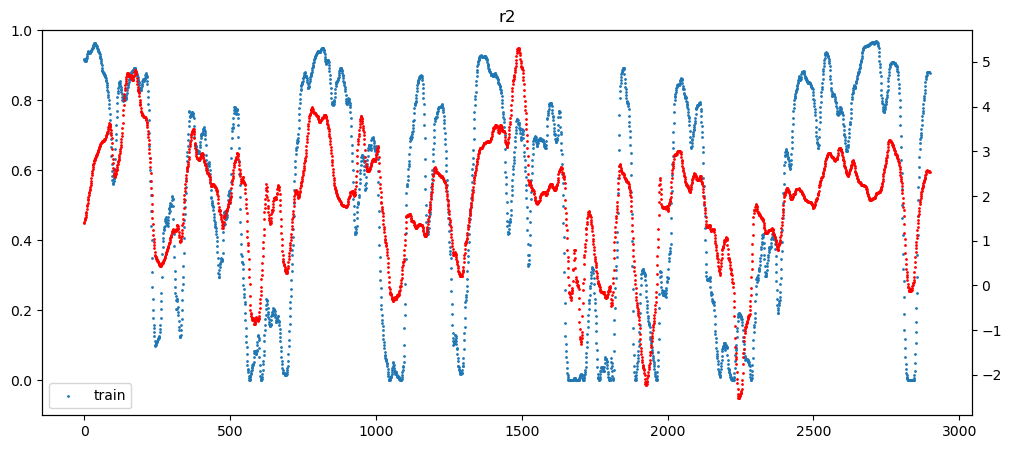

In [89]:
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.set_title("r2")
ax1.scatter(model_df.index, model_df["r2_train"], label="train", s=1)
# ax1.plot(model_df["r2_test"], label="test")
ax1.set_ylim(-0.1, 1)
# ax1.plot(model_df["r2_big_test"], label="big test")

ax1.legend()


ax2 = ax1.twinx()
ax2.scatter(model_df.index, model_df["m"], s=1, color="red")
# ax2.scatter(model_df.index, model_df["r2_diff"], s=1, color="red")


In [90]:
# test momentum in coconuts

In [180]:
chunk_size = 100
num_chunks = len(mid_df) // chunk_size

train_scores = []
models = []

# iterate for on less chunk
for ind in range(len(mid_df) // 10 - chunk_size):
    lb = ind
    ub = lb + chunk_size
    
    # get train/test data
    df = mid_df.iloc[lb:ub]
    
    x, y = np.arange(len(df)), df["coco_price"]
        
    # fit model on training data
    model = np.poly1d(np.polyfit(x, y, deg=1))
    models += [model]
    
    # eval model on training data
    y_train_pred = model(x)
    train_scores += [r2_score(y, y_train_pred)]
    
# agg data
coefs = [m.coef for m in models]
model_df = pd.DataFrame(coefs, columns=["m", "b"])

# get r2s
model_df["r2_train"] = train_scores
# model_df["r2_test"] = test_scores
# model_df["r2_big_test"] = big_test_scores

# find change in r2
model_df["r2_diff"] = model_df["r2_train"].shift(-1) - model_df["r2_train"]
model_df = model_df.dropna()


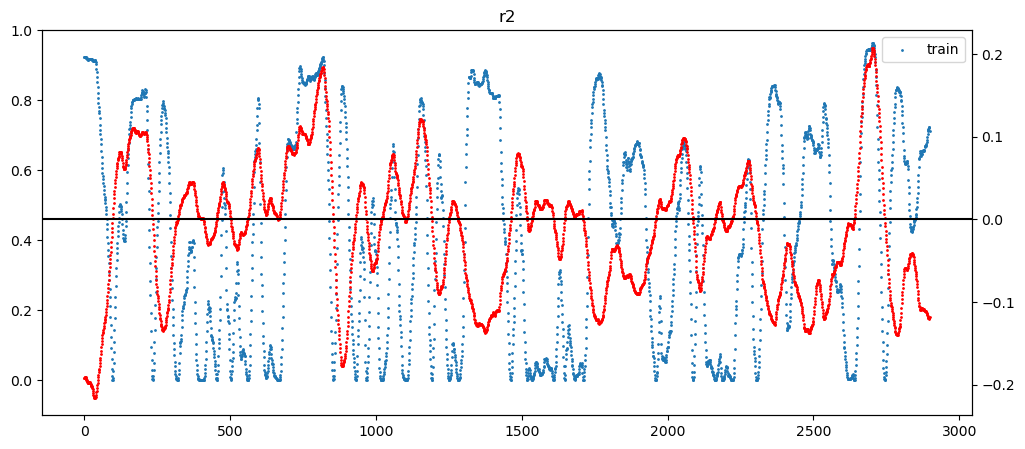

In [182]:
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.set_title("r2")
ax1.scatter(model_df.index, model_df["r2_train"], label="train", s=1)
# ax1.plot(model_df["r2_test"], label="test")
ax1.set_ylim(-0.1, 1)
# ax1.plot(model_df["r2_big_test"], label="big test")

ax1.legend()


ax2 = ax1.twinx()
ax2.scatter(model_df.index, model_df["m"], s=1, color="red")

ax2.axhline(y=0, color="black")
# ax2.scatter(model_df.index, model_df["r2_diff"], s=1, color="red")


In [183]:
def gen_random_walk(n):
#     np.random.seed(1)
    errs = np.random.normal(size=n)
    x = errs.cumsum()
    return np.insert(x, 0, 0)

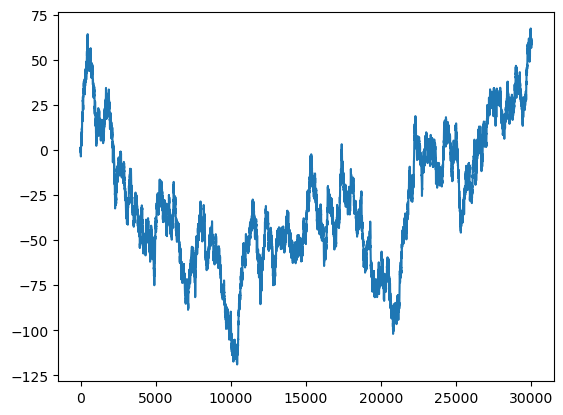

In [184]:
rw_data = gen_random_walk(30000)

plt.plot(rw_data)

In [190]:
chunk_size = 100
num_chunks = len(rw_data) // chunk_size

train_scores = []
models = []

# iterate for on less chunk
for ind in range(len(rw_data) // 10):
    lb = ind
    ub = lb + chunk_size
    
    # get train/test data
    df = rw_data[lb:ub]
    
    x, y = np.arange(df.size), df
        
    # fit model on training data
    model = np.poly1d(np.polyfit(x, y, deg=1))
    models += [model]
    
    # eval model on training data
    y_train_pred = model(x)
    train_scores += [r2_score(y, y_train_pred)]
    
# agg data
coefs = [m.coef for m in models]
model_df = pd.DataFrame(coefs, columns=["m", "b"])

# get r2s
model_df["r2_train"] = train_scores
# model_df["r2_test"] = test_scores
# model_df["r2_big_test"] = big_test_scores

# find change in r2
model_df["r2_diff"] = model_df["r2_train"].shift(-1) - model_df["r2_train"]
model_df = model_df.dropna()


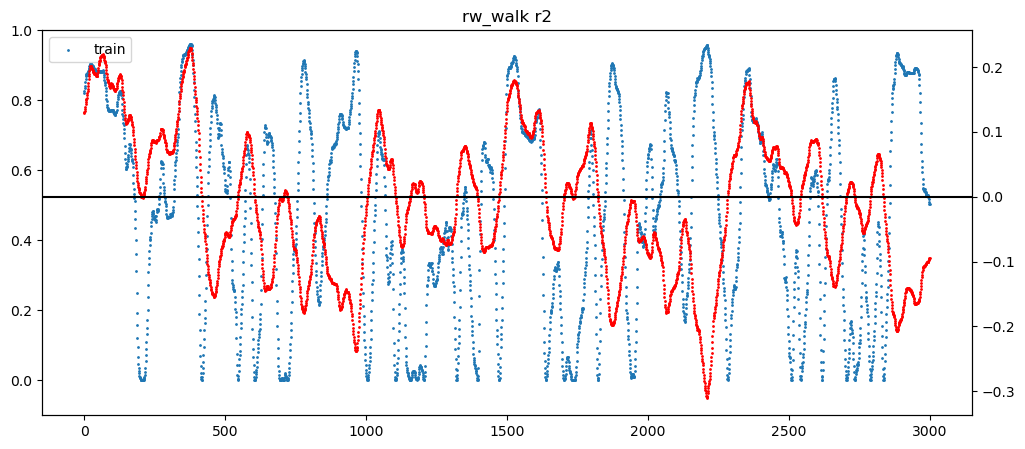

In [191]:
fig, ax1 = plt.subplots(figsize=(12, 5))

ax1.set_title("rw_walk r2")
ax1.scatter(model_df.index, model_df["r2_train"], label="train", s=1)
# ax1.plot(model_df["r2_test"], label="test")
ax1.set_ylim(-0.1, 1)
# ax1.plot(model_df["r2_big_test"], label="big test")

ax1.legend()


ax2 = ax1.twinx()
ax2.scatter(model_df.index, model_df["m"], s=1, color="red")

ax2.axhline(y=0, color="black")
# ax2.scatter(model_df.index, model_df["r2_diff"], s=1, color="red")


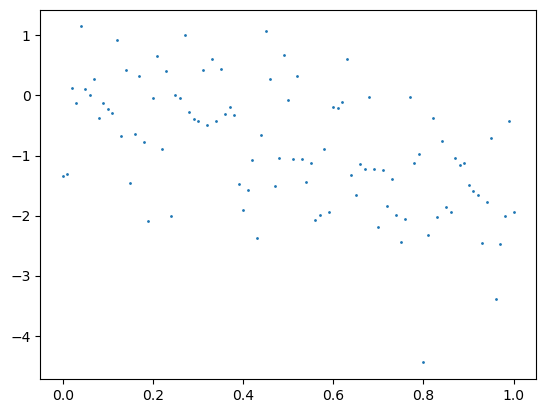

In [235]:
X = np.linspace(0, 1, 101)
y = -2 * X + np.random.normal(scale=1, size=X.size)

plt.scatter(X, y, s=1)

r2 0.2975831708122453
corr [[ 1.         -0.54551184]
 [-0.54551184  1.        ]]


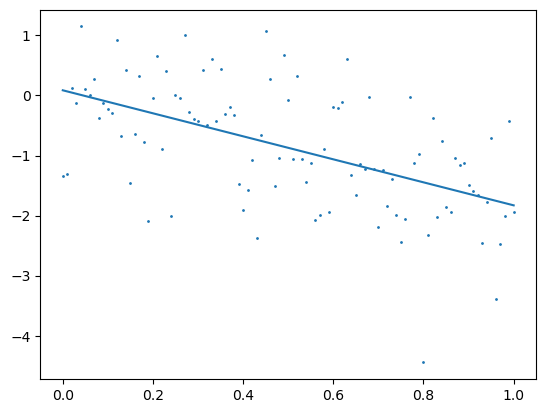

In [236]:
# fit a model
model = np.poly1d(np.polyfit(X, y, deg=1))
ypred = model(X)
print("r2", r2_score(y, ypred))
print("corr", np.corrcoef(X, y))

plt.scatter(X, y, s=1)
plt.plot(X, ypred)

In [237]:
model

poly1d([-1.91560956,  0.0864752 ])